## Question 1. MNIST classification using multi-class logistic regression 

Consider a L2-regularized multi-class logistic regression model using the MNIST dataset. 

The model is given by
$\hat{y}=\sigma(W^TX+\mathbf{b})$, where $\sigma(\cdot)$ is 
the softmax function 
$$\sigma_j(x) = \frac{e^{z_j}}{\sum_{k=1}^{K}e^{z_k}}$$

The objective is the cross-entropy loss function:

$$l(\hat{y},y)=-\sum_{k=1}^{K}y_k\log(\hat{y_k})$$

where $K$ is the number of classes and $\hat{y_{k}}$ is the output probability that a sample belongs to class k, with a L2 regularizer on the weight parameters $W$, i.e., $\lambda||W||_2^2$, the L2 norm of the vectorized $W$ where $\lambda$ is a hyper-parameter. 

The hyper-parameter settings are given as below:
- minibatch size = 128 
- starting learning rate $\eta^{(0)}=0.001$
- decaying learning rate $\eta^{(t)}=\eta^{(0)}/\sqrt{t}$ during training where $t$ is the number of epochs 
- Momentum = 0.7
- $\lambda=0.01$
- total number of epoches = 45

**Task:** Evaluate and plot **the average loss per epoch** versus the number of epochs for the training dataset, for the following optimization algorithms:
- Mini-batch gradient descent
- Mini-batch AdaGrad
- Mini-batch gradient descent with Nesterov’s momentum
- Mini-batch Adam 

Discuss how the performance of different optimization algorithms compare to each other.


In [2]:
# Load required libraries
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.datasets import mnist, cifar10
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure

In [3]:
tf.random.set_seed(1)
# loading the mnist dataset 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# print shape of training data
print(x_train.shape, y_train.shape)

# print shape of testing data
print(x_test.shape, y_test.shape)

# print out first 4 examples
print(y_train[:4]) 

# see unique labels in training data
print(np.unique(y_train))

# Range of values in training data
print(np.max(x_train), np.min(x_train))

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
[5 0 4 1]
[0 1 2 3 4 5 6 7 8 9]
255 0


In [4]:
# preprocessing the training data
x_train_p = np.reshape(x_train/255. , (-1,28*28))

# shape of preprocessed training data
print(x_train_p.shape)

# Range of values in preprocessed training data
print(np.max(x_train_p), np.min(x_train_p))

(60000, 784)
1.0 0.0


# 1.) Training using Mini-batch gradient descent

In [4]:
# defining callback for reducing learning rate based on epoch
def scheduler(epoch, lr):
    
    # set base learning rate 
    base_lr = 0.001
    
    # +1 because epoch starts at 0
    lr_new  = base_lr/np.sqrt(epoch+1)
    return lr_new 

# set callback to be used during model.fit()
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [5]:
tf.random.set_seed(1)
# defining the logistic regression model 
model = Sequential([Dense(units=10, activation="softmax", kernel_regularizer=tf.keras.regularizers.l2(0.01), input_shape=(28*28,))]) 

# Check out summary
model.summary()

# Set number of epochs
num_epochs = 45

# Set batch size #
num_batch_size = 128

# compile model
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.001), loss="sparse_categorical_crossentropy")

# History for plot later on
History_gd = model.fit(x_train_p,y_train, epochs = num_epochs, batch_size = 128,
                       # can change verbose=1 to see the logs
                       verbose=0, callbacks=[callback]) 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


# 2.) Training using Mini-batch AdaGrad

In [6]:
tf.random.set_seed(1)
model = Sequential([ Dense(units=10, activation="softmax", kernel_regularizer=tf.keras.regularizers.l2(0.01), input_shape=(28*28,))]) 
model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.001), loss="sparse_categorical_crossentropy")

# without learning rate decay  
# History_ada_grad = model.fit(x_train_p,y_train, epochs=num_epochs, batch_size = num_batch_size, verbose=0)

# with learning rate decay
History_ada_grad = model.fit(x_train_p,y_train, epochs = num_epochs, batch_size = num_batch_size, verbose = 0, callbacks=[callback]) 


# 3.) Training using Mini-batch gradient descent with Nesterov’s momentum


In [7]:
tf.random.set_seed(1)
model = Sequential([ Dense(units=10, activation="softmax", kernel_regularizer=tf.keras.regularizers.l2(0.01), input_shape=(28*28,))]) 
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.7 , nesterov=True), loss="sparse_categorical_crossentropy")

# without learning rate decay  
#H_nestrov = model.fit(x_train_p,y_train, epochs=3, batch_size=128, verbose=1)

# with learning rate decay
History_nestrov = model.fit(x_train_p,y_train, epochs=num_epochs, batch_size = num_batch_size, callbacks=[callback],verbose=0) 

# 4.) Training using Mini-batch Adam




In [8]:
tf.random.set_seed(1)
model = Sequential([ Dense(units=10, activation="softmax", kernel_regularizer=tf.keras.regularizers.l2(0.01), input_shape=(28*28,))]) 
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="sparse_categorical_crossentropy")

# without learning rate decay  
#History_adam = model.fit(x_train_p,y_train, epochs=num_epochs, batch_size=128, verbose=0) 

# with learning rate decay
History_adam = model.fit(x_train_p,y_train, epochs=num_epochs, batch_size = num_batch_size, callbacks=[callback],verbose = 0)

<Figure size 640x480 with 0 Axes>

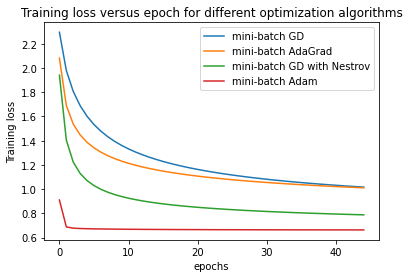

In [9]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

# plotting the average loss per epoch for the training dataset for different optimization algorithms 
num_epochs=45
plt.figure()
epochs = np.arange(0,num_epochs,1)

loss_gd = History_gd.history["loss"]
plt.plot(epochs, loss_gd, label="mini-batch GD")

loss_ada_grad = History_ada_grad.history["loss"]
plt.plot(epochs, loss_ada_grad, label="mini-batch AdaGrad")

loss_nestrov = History_nestrov.history["loss"]
plt.plot(epochs, loss_nestrov, label="mini-batch GD with Nestrov")

loss_adam = History_adam.history["loss"]
plt.plot(epochs, loss_adam, label="mini-batch Adam")

plt.xlabel("epochs")
plt.ylabel("Training loss")
plt.title("Training loss versus epoch for different optimization algorithms")
plt.legend()
plt.show()

### Discussion on the performance of different optimization algorithms compared to one another.

When comparing optimization algorithms we want an algorithm which yields the lowest Training Loss. Amgonst the four different optimization algorithms we implemented, Mini-batch Adam had the best overall performance. One thing to note about Mini-batch Adam is that it appears to plateau rather quickly. Mini-batch gradient descent with Nesterov’s momentum performed well too. As epochs increased it narrow the gap between itself and Mini-batch Adam.  Mini-batch AdaGrad and Mini-batch gradient descent had similar results. As epochs increased their results became nearly identical. Our epochs ranged from 0 to 45, but I suspect if the range of epochs was increased we would see gradient descent, AdaGrand and gradient descent with Nesterov’s momentum improve while Adam remained constant.

## Question 2. CIFAR10 CNN: convergence of minibatch gradient descent

Implement a CNN architecture that consists of 3 convolutional layers followed by a hidden fully connected layer of 1000 units. 

Each convolutional layer consists of a sublayer of 5x5 convolutional filters with stride 1 followed by a sublayer of 2x2 max-pool units with stride 2. Each neuron applies ReLU activation function.

**Task:** Evaluate **both the training and test loss function values** versus the number of epochs. In addition, show the results by adding dropout. Comment the results. 

**Hints:**

- Load CIFAR10 data by the following code:
```
from keras.datasets import cifar10
(data_train, label_train), (data_test, label_test) = cifar10.load_data()
```
- In order to reduce the training time, use only the first 50 mini-batches for each epoch. 
- More specifically, at the beginning of each epoch, randomly shuffle the whole dataset training dataset. Then, only iterate through the first 50 mini-batches for one epoch training.  
- Training on Google Colab GPU is highly recommended. The training time on 1 GPU is roughly 1 minute per epoch.  

The hyper-parameter settings:
- minibatch size = 128 
- learning rate = 0.001
- total number of epoches = 100

### Loading and preprocessing the dataset 

In [5]:
# loading the cifar10 dataset 
(data_train, label_train), (data_test, label_test) = cifar10.load_data()

# Insights into cifar data
print(data_train.shape, label_train.shape)
print(data_test.shape, label_test.shape)
print(label_train[:4])
print(np.unique(label_train))

# See range of values in training data
print(np.max(data_train), np.min(data_train))

# preprocessing the training dataset 
data_train_p = data_train/255. 
print(data_train_p.shape)

# preprocessing the testing dataset
data_test_p = data_test/255.
print(data_test_p.shape)

# See range of values in preprocessed training data (notice diff in max)
print(np.max(data_train_p), np.min(data_train_p))

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)
[[6]
 [9]
 [9]
 [4]]
[0 1 2 3 4 5 6 7 8 9]
255 0
(50000, 32, 32, 3)
(10000, 32, 32, 3)
1.0 0.0


In [11]:
# defining the model 
model = Sequential()

# convolutional layer w/ sublayer of 5x5 convolutional filters & stride 1
model.add(Conv2D(filters=64, kernel_size=(5,5), strides=(1,1), padding="same", activation="relu", input_shape=(32,32,3)))

# sublayer of 2x2 max-pool units with stride 2
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))

# DROPOUT LAYER
model.add(Dropout(rate=0.2)) 

# convolutional layer w/ sublayer of 5x5 convolutional filters & stride 1
model.add(Conv2D(filters=32, kernel_size=(5,5), strides=(1,1), padding = "same", activation="relu"))

# sublayer of 2x2 max-pool units with stride 2
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))

# convolutional layer w/ sublayer of 5x5 convolutional filters & stride 1
model.add(Conv2D(filters=10, kernel_size=(5,5), strides=(1,1), padding="valid", activation="relu"))

# sublayer of 2x2 max-pool units with stride 2
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='valid'))

# Flatten
model.add(Flatten())

# Add Dense layer
model.add(Dense(1000 , activation="relu"))

# DROPOUT LAYER
model.add(Dropout(rate=0.5))

# Add final Dense layer
model.add(Dense(10, activation="softmax"))

# see summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        51232     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 10)          8010      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 10)         

In [12]:
# compiling the model with adam optmizer
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam") # 0.001 is the default learning rate for Adam

# fit with epoches = 50, includes validation data
num_epochs = 50
History2 = model.fit(data_train_p, label_train, validation_data= (data_test_p, label_test) , batch_size= 128, epochs=num_epochs)


Epoch 1/50
391/391 [==============================] - 34s 10ms/step - loss: 1.9837 - val_loss: 1.4954
Epoch 2/50
391/391 [==============================] - 3s 8ms/step - loss: 1.4748 - val_loss: 1.3169
Epoch 3/50
391/391 [==============================] - 3s 8ms/step - loss: 1.3314 - val_loss: 1.2815
Epoch 4/50
391/391 [==============================] - 3s 8ms/step - loss: 1.2428 - val_loss: 1.1827
Epoch 5/50
391/391 [==============================] - 3s 8ms/step - loss: 1.1803 - val_loss: 1.1222
Epoch 6/50
391/391 [==============================] - 3s 8ms/step - loss: 1.1324 - val_loss: 1.1341
Epoch 7/50
391/391 [==============================] - 3s 8ms/step - loss: 1.0925 - val_loss: 1.0830
Epoch 8/50
391/391 [==============================] - 3s 8ms/step - loss: 1.0609 - val_loss: 1.0629
Epoch 9/50
391/391 [==============================] - 3s 8ms/step - loss: 1.0255 - val_loss: 1.0338
Epoch 10/50
391/391 [==============================] - 3s 8ms/step - loss: 0.9881 - val_loss: 1.03

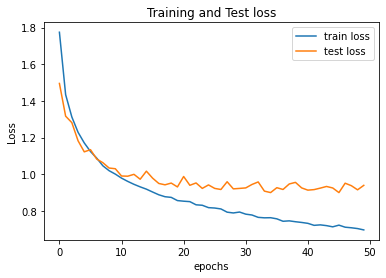

In [13]:
# plotting training and testing loss 
epochs = np.arange(0,num_epochs,1)
train_loss = History2.history["loss"]
# also called validation loss (Although test and validation loss are diff in ML)
test_loss  = History2.history["val_loss"] 

plt.figure()
plt.plot(epochs, train_loss, label="train loss")
plt.plot(epochs, test_loss, label="test loss" )
plt.title("Training and Test loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [14]:
# model training using only the 50 first mini-batches after randomly shuffling data on each epoch 
num_epochs = 100
mini_batch_size  = 128
num_mini_batches = 50
num_full_train_samples = data_train_p.shape[0]
num_train_samples_per_epoch = mini_batch_size*num_mini_batches

train_losses = []
test_losses  = []
for i in range(num_epochs):
    indices = np.random.choice( num_full_train_samples , size=(num_train_samples_per_epoch,) , replace=False)
    data_train_set = data_train_p[indices]
    label_train_set = label_train[indices]
    H = model.fit(data_train_set, label_train_set, validation_data= (data_test_p, label_test) , batch_size= 128, epochs=1)
    train_losses = train_losses + H.history["loss"]
    test_losses  = test_losses  + H.history["val_loss"]


print(len(train_losses), len(test_losses))

50/50 [==============================] - 1s 15ms/step - loss: 0.6528 - val_loss: 0.9002
100 100


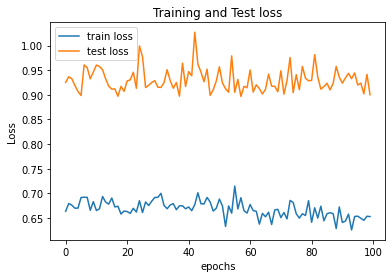

In [15]:
# plotting training and testing loss 
epochs = np.arange(0,num_epochs,1)
plt.figure()
plt.plot(epochs, train_losses, label="train loss")
plt.plot(epochs, test_losses, label="test loss" )
plt.title("Training and Test loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

The visualization above illustrates the Training and Testing loss over 100 epochs. As you can see they follow a similar path. The training loss decreases at a faster rate. Towards the end of the X-axis the gap between training loss and test increass increases.

## Question 3. CIFAR10 image classification

Design and implement a convolutional neural network for the CIFAR10 image classification task aiming to achieve a high test accuracy. Evaluate the classification accuracy by reporting top-1 and top-5 test error rates. 

**Task:** Plot the loss function, top-1 error rate and top-5 error rate per epoch versus the number of epochs for the training and the test dataset. 
Make sure to well describe and justify your network architecture design choices. 

### Base Model

In [5]:
# defining the model 
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(5,5), strides=(1,1), padding="same", activation="relu", input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='valid'))
model.add(Conv2D(filters=10, kernel_size=(5,5), strides=(1,1), padding="valid", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='valid'))
model.add(Flatten())
model.add(Dense(1000 , activation="relu"))
model.add(Dense(10, activation="softmax"))

# see summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 10)        16010     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 10)          0         
_________________________________________________________________
flatten (Flatten)            (None, 360)               0         
_________________________________________________________________
dense (Dense)                (None, 1000)              361000    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

Our base model is a simple CNN with two CNN layers. We wanted to start off by having a base model to compare our more complex models too. With the two CNN layers we also add two MaxPooling layers before flatting the network. As you can see the base model's architecture lead to a small number of overall paramters.

In [17]:
# compiling the model with adam optmizer and specifying the accuracy metrics (top-1 and top-5 accuracy)
acc_metrics = [tf.keras.metrics.SparseTopKCategoricalAccuracy(k=1, name='Top_1_Acc') , 
               tf.keras.metrics.SparseTopKCategoricalAccuracy(k=5, name='Top_5_Acc')]
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics= acc_metrics) 


# training the model 
num_epochs = 100
mini_batch_size  = 128
num_mini_batches = 50
num_full_train_samples = data_train_p.shape[0]
num_train_samples_per_epoch = mini_batch_size*num_mini_batches

train_losses = []
test_losses = []
train_top_1_acc = []
train_top_5_acc = []
test_top_1_acc = []
test_top_5_acc = []

for i in range(num_epochs):
    indices = np.random.choice(num_full_train_samples , size=(num_train_samples_per_epoch,) , replace=False)
    data_train_set = data_train_p[indices]
    label_train_set = label_train[indices]
    H = model.fit(data_train_set, label_train_set, validation_data= (data_test_p, label_test) , batch_size= mini_batch_size, epochs = 1)
    train_losses.append(H.history["loss"])
    test_losses.append(H.history["val_loss"])
    train_top_1_acc.append(H.history["Top_1_Acc"])
    train_top_5_acc.append(H.history["Top_5_Acc"])
    test_top_1_acc.append(H.history["val_Top_1_Acc"])
    test_top_5_acc.append(H.history["val_Top_5_Acc"])


50/50 [==============================] - 1s 14ms/step - loss: 0.4722 - Top_1_Acc: 0.8353 - Top_5_Acc: 0.9925 - val_loss: 1.1230 - val_Top_1_Acc: 0.6605 - val_Top_5_Acc: 0.9655


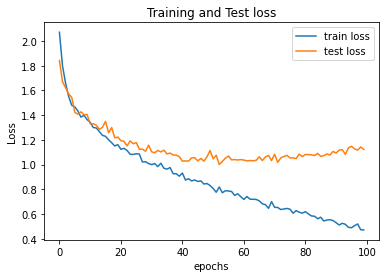

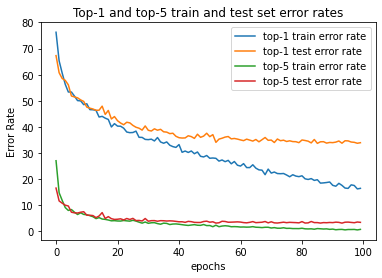

In [18]:
# plotting the results 
train_top_1_error = (1 - np.array(train_top_1_acc))*100
test_top_1_error  = (1 - np.array(test_top_1_acc))*100
train_top_5_error = (1 - np.array(train_top_5_acc))*100
test_top_5_error  = (1 - np.array(test_top_5_acc))*100

epochs = np.arange(0,num_epochs,1)
plt.figure()
plt.plot(epochs, train_losses, label="train loss")
plt.plot(epochs, test_losses, label="test loss" )
plt.title("Training and Test loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()

plt.figure()
plt.plot(epochs, train_top_1_error, label="top-1 train error rate")
plt.plot(epochs, test_top_1_error, label="top-1 test error rate")
plt.plot(epochs, train_top_5_error, label="top-5 train error rate")
plt.plot(epochs, test_top_5_error, label="top-5 test error rate")
plt.title("Top-1 and top-5 train and test set error rates")
plt.xlabel("epochs")
plt.ylabel("Error Rate")
plt.legend()

plt.show()

The test loss gradual increases at 40 epochs plus, while the training loss always decreases.

### Model 2

In [19]:
# defining the model 
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(5,5), strides=(1,1), padding="same", activation="relu", input_shape=(32,32,3)))

# Adding Batch Normalization
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='valid'))
model.add(Conv2D(filters=32, kernel_size=(5,5), strides=(1,1), padding="valid", activation="relu"))

# Adding drop out
model.add(Dropout(0.2))

# Adding Batch Normalization
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='valid'))

# Adding Conv2D, Batch Normalization
model.add(Conv2D(filters=64, kernel_size=(5,5), strides=(1,1), padding="same", activation="relu", input_shape=(32,32,3)))
model.add(BatchNormalization())

# Adding drop out
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(1000 , activation="relu"))
model.add(Dense(10, activation="softmax"))

# see summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 64)        4864      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 32)        51232     
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 12, 12, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 32)         

Make the model more complex by introducing more CNN layers. We add dropout layers to decrease the chance of overfitting

In [8]:
# compiling the model with adam optmizer and specifying the accuracy metrics (top-1 and top-5 accuracy)
acc_metrics = [tf.keras.metrics.SparseTopKCategoricalAccuracy(k=1, name='Top_1_Acc') , 
               tf.keras.metrics.SparseTopKCategoricalAccuracy(k=5, name='Top_5_Acc') ]

# Changing learning rate by a factor of 10
model.compile(loss="sparse_categorical_crossentropy", optimizer = tf.keras.optimizers.Adam(learning_rate=0.01), metrics= acc_metrics) 


# training the model 
num_epochs = 100
mini_batch_size  = 128
num_mini_batches = 75
num_full_train_samples = data_train_p.shape[0]
num_train_samples_per_epoch = mini_batch_size*num_mini_batches

train_losses = []
test_losses = []
train_top_1_acc = []
train_top_5_acc = []
test_top_1_acc = []
test_top_5_acc = []

for i in range(num_epochs):
    indices = np.random.choice(num_full_train_samples , size=(num_train_samples_per_epoch,) , replace=False)
    data_train_set = data_train_p[indices]
    label_train_set = label_train[indices]
    H = model.fit(data_train_set, label_train_set, validation_data= (data_test_p, label_test) , batch_size = mini_batch_size, epochs=1)
    train_losses.append(H.history["loss"])
    test_losses.append(H.history["val_loss"])
    train_top_1_acc.append(H.history["Top_1_Acc"])
    train_top_5_acc.append(H.history["Top_5_Acc"])
    test_top_1_acc.append(H.history["val_Top_1_Acc"])
    test_top_5_acc.append(H.history["val_Top_5_Acc"])

75/75 [==============================] - 1s 11ms/step - loss: 2.3031 - Top_1_Acc: 0.0979 - Top_5_Acc: 0.4985 - val_loss: 2.3030 - val_Top_1_Acc: 0.1000 - val_Top_5_Acc: 0.5000


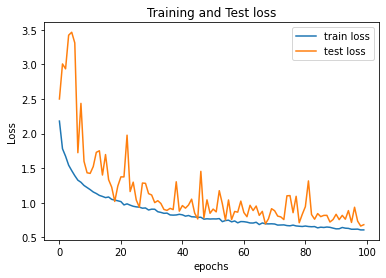

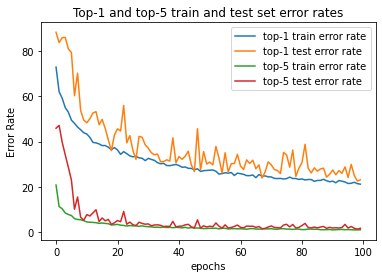

In [13]:
# plotting the results 
train_top_1_error = (1 - np.array(train_top_1_acc))*100
test_top_1_error  = (1 - np.array(test_top_1_acc))*100
train_top_5_error = (1 - np.array(train_top_5_acc))*100
test_top_5_error  = (1 - np.array(test_top_5_acc))*100

epochs = np.arange(0,num_epochs,1)
plt.figure()
plt.plot(epochs, train_losses, label="train loss")
plt.plot(epochs, test_losses, label="test loss" )
plt.title("Training and Test loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()

plt.figure()
plt.plot(epochs, train_top_1_error, label="top-1 train error rate")
plt.plot(epochs, test_top_1_error, label="top-1 test error rate")
plt.plot(epochs, train_top_5_error, label="top-5 train error rate")
plt.plot(epochs, test_top_5_error, label="top-5 test error rate")
plt.title("Top-1 and top-5 train and test set error rates")
plt.xlabel("epochs")
plt.ylabel("Error Rate")
plt.legend()

plt.show()

In [14]:
In Model 2 we decided to tweak the learning rate by a factor of 10. In comparison to the base model, the test loss remains consistent.

SyntaxError: ignored

### Model 3

In [10]:
# defining the model 
model = Sequential()

# Changing kernel_size
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu", input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='valid'))
model.add(Dropout(0.5))

# Changing kernel_size
model.add(Conv2D(filters = 64, kernel_size=(3,3), strides=(1,1), padding="valid", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='valid'))

# Adding 2D Convolution Layer and Batch Normalization
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding="valid", activation="relu"))
model.add(BatchNormalization())

model.add(Dropout(0.25))
model.add(Conv2D(filters = 64, kernel_size=(3,3), strides=(1,1), padding="valid", activation="relu"))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(1000 , activation="relu"))
model.add(Dense(10, activation="softmax"))

# see summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)         

In [11]:
# compiling the model with adam optmizer and specifying the accuracy metrics (top-1 and top-5 accuracy)
acc_metrics = [tf.keras.metrics.SparseTopKCategoricalAccuracy(k=1, name='Top_1_Acc') , 
               tf.keras.metrics.SparseTopKCategoricalAccuracy(k=5, name='Top_5_Acc') ]
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics= acc_metrics) 


# training the model 
num_epochs = 100
mini_batch_size  = 128
num_mini_batches = 75
num_full_train_samples = data_train_p.shape[0]
num_train_samples_per_epoch = mini_batch_size*num_mini_batches

train_losses = []
test_losses = []
train_top_1_acc = []
train_top_5_acc = []
test_top_1_acc = []
test_top_5_acc = []

for i in range(num_epochs):
    indices = np.random.choice(num_full_train_samples , size=(num_train_samples_per_epoch,) , replace=False)
    data_train_set = data_train_p[indices]
    label_train_set = label_train[indices]
    H = model.fit(data_train_set, label_train_set, validation_data= (data_test_p, label_test) , batch_size= mini_batch_size, epochs=1)
    train_losses.append(H.history["loss"])
    test_losses.append(H.history["val_loss"])
    train_top_1_acc.append(H.history["Top_1_Acc"])
    train_top_5_acc.append(H.history["Top_5_Acc"])
    test_top_1_acc.append(H.history["val_Top_1_Acc"])
    test_top_5_acc.append(H.history["val_Top_5_Acc"])

75/75 [==============================] - 1s 13ms/step - loss: 0.6077 - Top_1_Acc: 0.7883 - Top_5_Acc: 0.9903 - val_loss: 0.6829 - val_Top_1_Acc: 0.7691 - val_Top_5_Acc: 0.9836


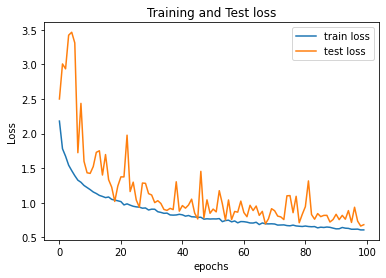

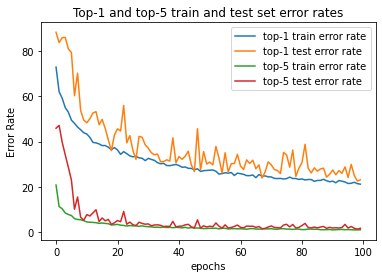

In [12]:
# plotting the results 
train_top_1_error = (1 - np.array(train_top_1_acc))*100
test_top_1_error  = (1 - np.array(test_top_1_acc))*100
train_top_5_error = (1 - np.array(train_top_5_acc))*100
test_top_5_error  = (1 - np.array(test_top_5_acc))*100

epochs = np.arange(0,num_epochs,1)
plt.figure()
plt.plot(epochs, train_losses, label="train loss")
plt.plot(epochs, test_losses, label="test loss" )
plt.title("Training and Test loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()

plt.figure()
plt.plot(epochs, train_top_1_error, label="top-1 train error rate")
plt.plot(epochs, test_top_1_error, label="top-1 test error rate")
plt.plot(epochs, train_top_5_error, label="top-5 train error rate")
plt.plot(epochs, test_top_5_error, label="top-5 test error rate")
plt.title("Top-1 and top-5 train and test set error rates")
plt.xlabel("epochs")
plt.ylabel("Error Rate")
plt.legend()

plt.show()

### Model 4

In [6]:
# defining the model 
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(5,5), strides=(1,1), padding="same", activation="relu", input_shape=(32,32,3)))

# Adding Batch Normalization
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
model.add(Conv2D(filters=10, kernel_size=(5,5), strides=(1,1), padding="same", activation="relu"))

# Adding Batch Normalization
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))

model.add(Conv2D(filters=10, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=10, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())

# Adding drop out
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(1000 , activation="relu"))
model.add(Dense(10, activation="softmax"))

# see summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        4864      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 10)        16010     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 10)        40        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 10)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 10)          9

In [7]:
# compiling the model with adam optmizer and specifying the accuracy metrics (top-1 and top-5 accuracy)
acc_metrics = [tf.keras.metrics.SparseTopKCategoricalAccuracy(k=1, name='Top_1_Acc') , 
               tf.keras.metrics.SparseTopKCategoricalAccuracy(k=5, name='Top_5_Acc') ]
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics= acc_metrics) 


# training the model 
num_epochs = 100
mini_batch_size  = 128
num_mini_batches = 85
num_full_train_samples = data_train_p.shape[0]
num_train_samples_per_epoch = mini_batch_size*num_mini_batches

train_losses = []
test_losses = []
train_top_1_acc = []
train_top_5_acc = []
test_top_1_acc = []
test_top_5_acc = []

for i in range(num_epochs):
    indices = np.random.choice(num_full_train_samples , size=(num_train_samples_per_epoch,) , replace=False)
    data_train_set = data_train_p[indices]
    label_train_set = label_train[indices]
    H = model.fit(data_train_set, label_train_set, validation_data= (data_test_p, label_test) , batch_size= mini_batch_size, epochs=1)
    train_losses.append(H.history["loss"])
    test_losses.append(H.history["val_loss"])
    train_top_1_acc.append(H.history["Top_1_Acc"])
    train_top_5_acc.append(H.history["Top_5_Acc"])
    test_top_1_acc.append(H.history["val_Top_1_Acc"])
    test_top_5_acc.append(H.history["val_Top_5_Acc"])

85/85 [==============================] - 1s 14ms/step - loss: 0.3331 - Top_1_Acc: 0.8832 - Top_5_Acc: 0.9985 - val_loss: 1.0553 - val_Top_1_Acc: 0.7054 - val_Top_5_Acc: 0.9680


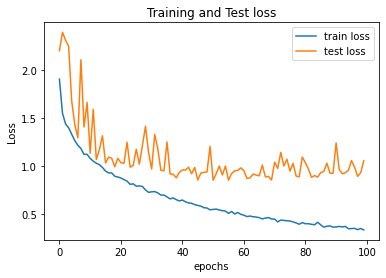

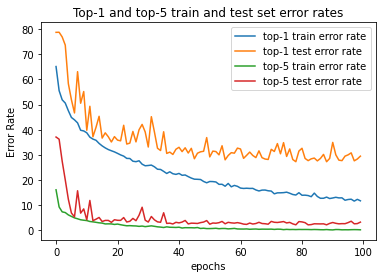

In [8]:
# plotting the results 
train_top_1_error = (1 - np.array(train_top_1_acc))*100
test_top_1_error  = (1 - np.array(test_top_1_acc))*100
train_top_5_error = (1 - np.array(train_top_5_acc))*100
test_top_5_error  = (1 - np.array(test_top_5_acc))*100

epochs = np.arange(0,num_epochs,1)
plt.figure()
plt.plot(epochs, train_losses, label="train loss")
plt.plot(epochs, test_losses, label="test loss" )
plt.title("Training and Test loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()

plt.figure()
plt.plot(epochs, train_top_1_error, label="top-1 train error rate")
plt.plot(epochs, test_top_1_error, label="top-1 test error rate")
plt.plot(epochs, train_top_5_error, label="top-5 train error rate")
plt.plot(epochs, test_top_5_error, label="top-5 test error rate")
plt.title("Top-1 and top-5 train and test set error rates")
plt.xlabel("epochs")
plt.ylabel("Error Rate")
plt.legend()

plt.show()

#### As You can see the testing loss for our model peaks at around 30 epochs and at around 80 epochs it stays flat.

### Model 5

In [9]:
# defining the model 
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu", input_shape=(32,32,3), kernel_regularizer='l2'))
# Adding Batch Normalization
model.add(BatchNormalization())

model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu", input_shape=(32,32,3), kernel_regularizer='l2'))
# Adding Batch Normalization
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))

# Adding drop out
model.add(Dropout(0.2))

# Adding Batch Normalization
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))

model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())

# Adding drop out
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512 , activation="relu"))
model.add(Dense(10, activation="softmax"))

# see summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_4 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_5 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 16, 16, 32)       

### In our final model we make modification to model 4 in order to produce a more accurcate model. Our first step is by adding l2 regularization by adding "kernel_regularizer='l2'" tp the dense layer. We also added more drop out layers to make sure we don't overfit given the increase in paramters. Lastly, we modified the flatten from 1,000 to 512 in order to minimize the amount of paramters used. Our modifications significantly imrpoved from Model 4. Our newest model val_Top_1_Acc: 0.7826

In [10]:
# compiling the model with adam optmizer and specifying the accuracy metrics (top-1 and top-5 accuracy)
acc_metrics = [tf.keras.metrics.SparseTopKCategoricalAccuracy(k=1, name='Top_1_Acc') , 
               tf.keras.metrics.SparseTopKCategoricalAccuracy(k=5, name='Top_5_Acc') ]
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics= acc_metrics) 


# training the model 
num_epochs = 100
mini_batch_size  = 128
num_mini_batches = 100
num_full_train_samples = data_train_p.shape[0]
num_train_samples_per_epoch = mini_batch_size*num_mini_batches

train_losses = []
test_losses = []
train_top_1_acc = []
train_top_5_acc = []
test_top_1_acc = []
test_top_5_acc = []

for i in range(num_epochs):
    indices = np.random.choice(num_full_train_samples , size=(num_train_samples_per_epoch,) , replace = False)
    data_train_set = data_train_p[indices]
    label_train_set = label_train[indices]
    H = model.fit(data_train_set, label_train_set, validation_data= (data_test_p, label_test) , batch_size= mini_batch_size, epochs=1)
    train_losses.append(H.history["loss"])
    test_losses.append(H.history["val_loss"])
    train_top_1_acc.append(H.history["Top_1_Acc"])
    train_top_5_acc.append(H.history["Top_5_Acc"])
    test_top_1_acc.append(H.history["val_Top_1_Acc"])
    test_top_5_acc.append(H.history["val_Top_5_Acc"])

100/100 [==============================] - 1s 15ms/step - loss: 0.1807 - Top_1_Acc: 0.9522 - Top_5_Acc: 0.9998 - val_loss: 0.9975 - val_Top_1_Acc: 0.7677 - val_Top_5_Acc: 0.9826


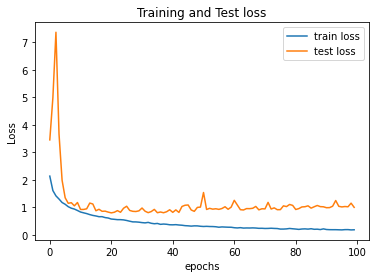

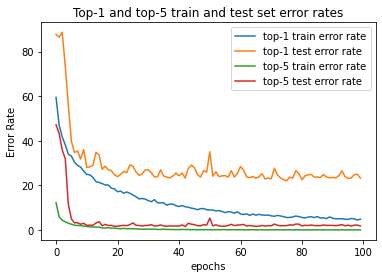

In [11]:
# plotting the results 
train_top_1_error = (1 - np.array(train_top_1_acc))*100
test_top_1_error  = (1 - np.array(test_top_1_acc))*100
train_top_5_error = (1 - np.array(train_top_5_acc))*100
test_top_5_error  = (1 - np.array(test_top_5_acc))*100

epochs = np.arange(0,num_epochs,1)
plt.figure()
plt.plot(epochs, train_losses, label="train loss")
plt.plot(epochs, test_losses, label="test loss" )
plt.title("Training and Test loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()

plt.figure()
plt.plot(epochs, train_top_1_error, label="top-1 train error rate")
plt.plot(epochs, test_top_1_error, label="top-1 test error rate")
plt.plot(epochs, train_top_5_error, label="top-5 train error rate")
plt.plot(epochs, test_top_5_error, label="top-5 test error rate")
plt.title("Top-1 and top-5 train and test set error rates")
plt.xlabel("epochs")
plt.ylabel("Error Rate")
plt.legend()

plt.show()

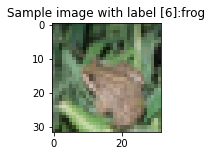

In [12]:
# list with cifar10 label names
cifar10_label_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

# loading image and true label
index = 4
input_img = data_test_p[index]
plt.figure(figsize=(2,2))
plt.imshow(input_img)
plt.title("Sample image with label {}:{}".format(label_test[index], cifar10_label_names[label_test[index][0]]))
plt.show()

### Example of a prediction using our best model (Model 5)

In [13]:
# prediction using trained model
y_pred = model.predict(np.array([input_img]))
print("Class prediction probabilities : \n {}".format(y_pred))
print("Model prediction- {}:{}".format(np.argmax(y_pred), cifar10_label_names[np.argmax(y_pred)]))


Class prediction probabilities : 
 [[8.3433169e-17 7.7151789e-08 5.5863452e-06 1.9224399e-07 8.1213051e-04
  4.6345973e-13 9.9918205e-01 1.1482779e-12 1.7184668e-09 4.8608561e-12]]
Model prediction- 6:frog
